# Binary Image Clasification 

Lets classify roses vs sunflowers

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/noob_vision/cnn_classification_tf.ipynb)

### Hey Ferb, I know what we're gonna do today

1. Download and arrange dataset in file system
2. Load the training and valdiation data 
3. Create a CNN Model
4. Train the model
5. Test the model


## Step 1: Download and arrange dataset in file systems

In [7]:
import tensorflow as tf
import numpy as np
import pathlib                  # For folder/file related operations
import matplotlib.pyplot as plt # For plotting graphs and showing images

# Download the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# You don't need to seperate libraries to download and zip file, tensorflow itself has one built one, lets use that
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname="the_dataset", extract=True, cache_dir="./")
# Pathlib allows you to do some path handling operations
data_dir = pathlib.Path(data_dir)
data_dir =  data_dir.parent.joinpath ('flower_photos')

# list the contents of data dir
# "!" indicated shell commands
!ls $data_dir

228818944/228813984 [==============================] - 1s 0us/step
daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


## Step 2: Load the training and validation data 


In [17]:
BATCH_SIZE = 32 # Instead of running all dataset one session its split into multiple batches for faster training and better convergence
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMG_CHANNELS = 3 # RGB has 3 channels each represensting intensity of Red, Green, Blue 

# To load the image from directory we can use the tensorflow api itself
# training and validation split can also be configured with the same api
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,               # path to dataset
    validation_split=0.2,   # percent of data reserved for validation
    subset="training",      # training or validation subset
    seed=123,               # seed helps in shuffling images same way for both training and validation 
    image_size=(IMG_HEIGHT, IMG_WIDTH), 
    batch_size=BATCH_SIZE   
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2,
    subset="validation", 
    seed=123, 
    image_size=(IMG_HEIGHT, IMG_WIDTH), 
    batch_size=BATCH_SIZE)

# store the class names
class_names = train_ds.class_names
print (class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Step 3: Create a CNN Model


In [18]:
from tensorflow.keras import layers, models

# The optimal number of layers, filters varies with scenarios, so its best start with simple network and increase the complexity to get good results
# complexity brings another problem overfitting - we will be discussing this on a different experiment
model = models.Sequential([
                           layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Flatten(),
                           layers.Dropout(0.2), # This drops 20% percent of previous nodes to prevent over fitting 
                           layers.Dense(256, activation='relu'),
                           layers.Dropout(0.2),
                           layers.Dense(len(class_names))
])


model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

## Step 4: Train the model


Epoch 1/20
92/92 [==============================] - 6s 57ms/step - loss: 21.1021 - accuracy: 0.2660 - val_loss: 1.3190 - val_accuracy: 0.4455
Epoch 2/20
92/92 [==============================] - 5s 55ms/step - loss: 1.2997 - accuracy: 0.4285 - val_loss: 1.1321 - val_accuracy: 0.5395
Epoch 3/20
92/92 [==============================] - 5s 56ms/step - loss: 1.1148 - accuracy: 0.5467 - val_loss: 1.2896 - val_accuracy: 0.4523
Epoch 4/20
92/92 [==============================] - 5s 56ms/step - loss: 1.0566 - accuracy: 0.5776 - val_loss: 1.0465 - val_accuracy: 0.5668
Epoch 5/20
92/92 [==============================] - 6s 57ms/step - loss: 0.8828 - accuracy: 0.6512 - val_loss: 1.0599 - val_accuracy: 0.5777
Epoch 6/20
92/92 [==============================] - 5s 56ms/step - loss: 0.8171 - accuracy: 0.6846 - val_loss: 1.0524 - val_accuracy: 0.6158
Epoch 7/20
92/92 [==============================] - 5s 56ms/step - loss: 0.7203 - accuracy: 0.7297 - val_loss: 1.0511 - val_accuracy: 0.6063
Epoch 8/20
9

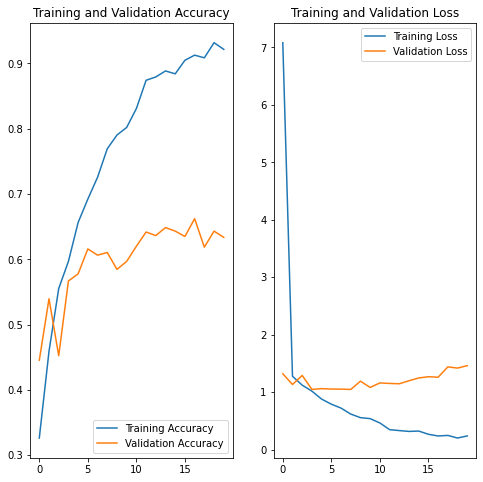

In [19]:
epochs = 20

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# Thats it at this point the model is trained 
# Lets plot the accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# below is matplotlib api's to plot line graph
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('H.png')

## Step 5: Test the model


In [29]:
# Place an url of any new images and try the results 
image_url = "https://upload.wikimedia.org/wikipedia/commons/c/ce/Daisy_G%C3%A4nsebl%C3%BCmchen_Bellis_perennis_01.jpg"

# tf cahces the data to be dowloaded, so just make sure we clean if any previous image was already stored
!rm datasets/Image.png

# Download the image to local storage
image_path = tf.keras.utils.get_file('Image.png', origin=image_url, cache_dir="./")
# Load the image from local storage using tensorflow api's 
img = tf.keras.preprocessing.image.load_img(
    image_path, 
    target_size=(IMG_WIDTH, IMG_HEIGHT)
    )
img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print("This definitely an {} - {}".format(class_names[np.argmax(score)], round(100 * np.max(score))))

1261568/1256730 [==============================] - 0s 0us/step
This definitely an daisy - 100
